In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Create the neural network model
model_without = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_with = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [4]:
model_without.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_with.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
def evaluate_model(history):
  plt.figure(figsize=(12, 4))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

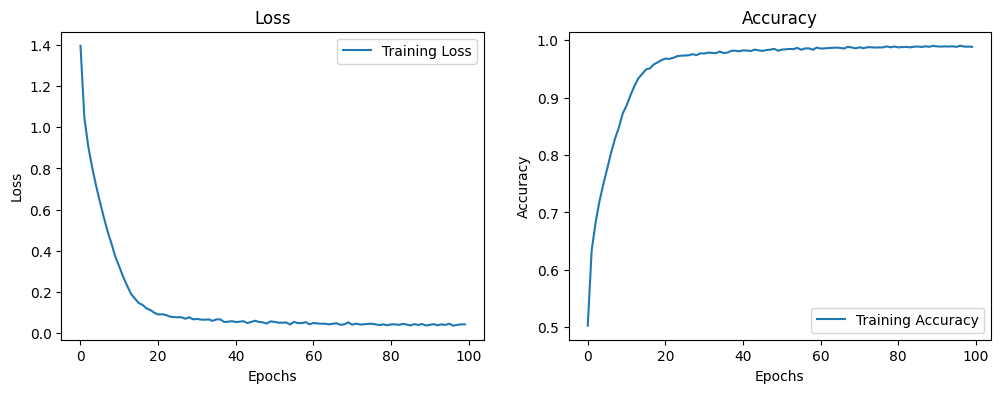

In [6]:
history_without = model_without.fit(X_train, y_train, epochs=100,verbose=0)
evaluate_model(history_without)

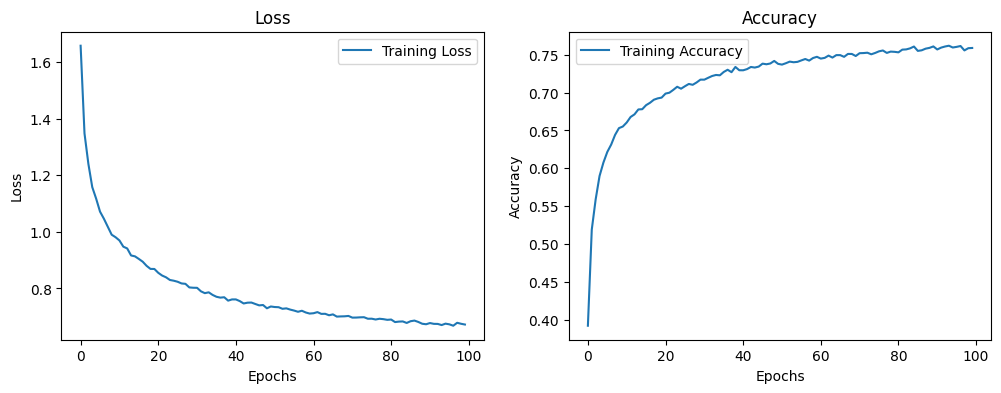

In [7]:
history_with = model_with.fit(X_train, y_train, epochs=100,verbose=0)
evaluate_model(history_with)

In [8]:
loss, accuracy = model_without.evaluate(X_test, y_test, verbose=1)
print(f'Without Dropout Test Accuracy: {accuracy:.2f}')

313/313 [==============================] - 1s 3ms/step - loss: 5.5444 - accuracy: 0.6650
Without Dropout Test Accuracy: 0.67


In [9]:
loss2, accuracy2 = model_with.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy2:.2f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7297 - accuracy: 0.7540
Test Accuracy: 0.75


Looks like dropout worked pretty well.
